Dataset Shape: (45211, 17)

First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Accuracy: 0.8935087913303107

Classification Report:
              

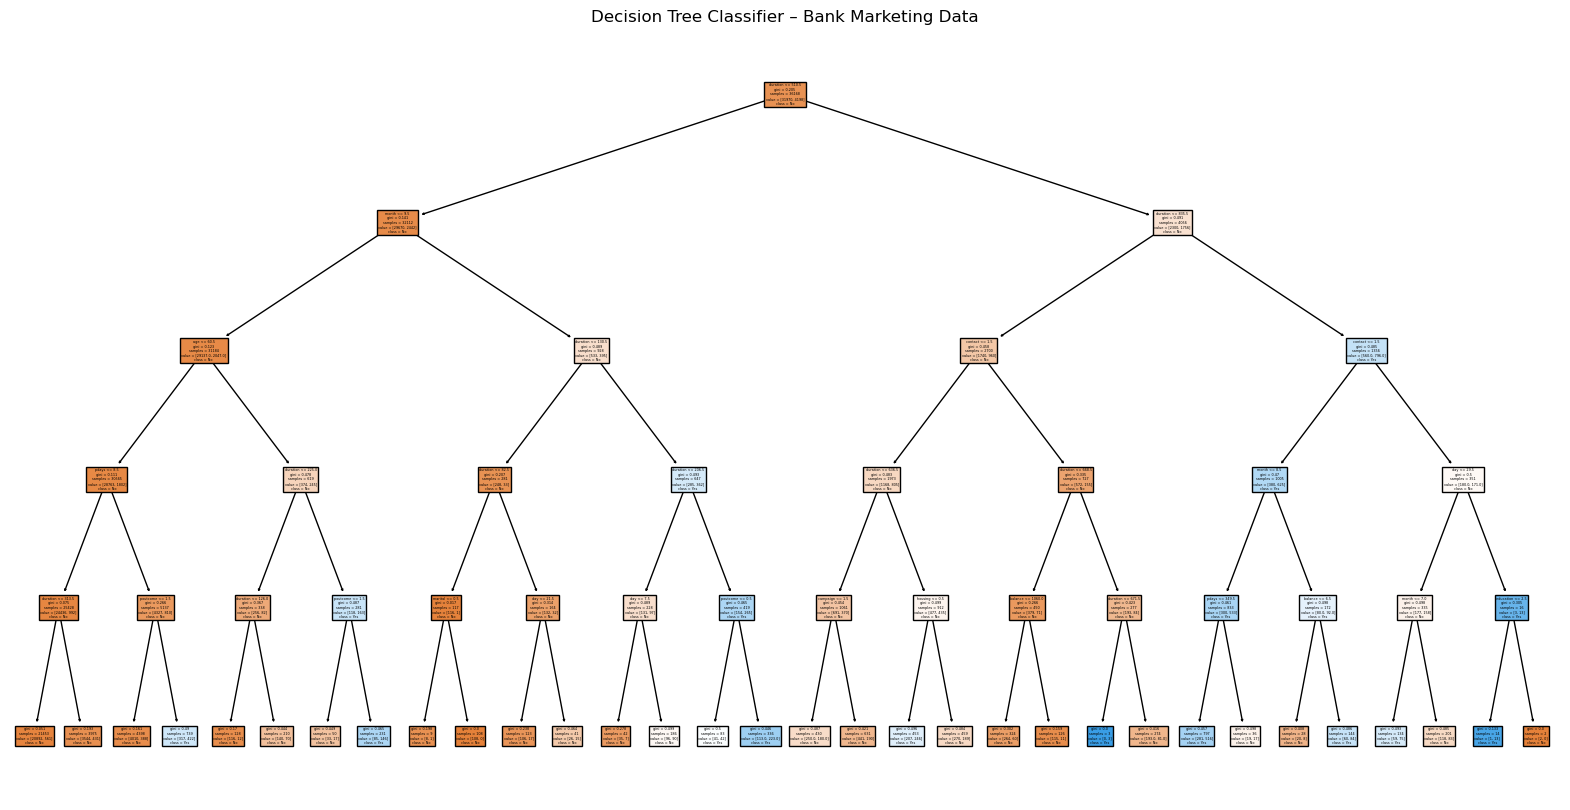

In [3]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ================================
# 2. Load Dataset
# ================================
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\bank+marketing\bank\bank-full.csv", sep=";")

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

# ================================
# 3. Data Preprocessing
# ================================

# Convert target variable (y) to binary
data["y"] = data["y"].map({"yes": 1, "no": 0})

# Encode categorical features
label_encoder = LabelEncoder()
for col in data.select_dtypes(include="object").columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
X = data.drop("y", axis=1)
y = data["y"]

# ================================
# 4. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 5. Train Decision Tree Classifier
# ================================
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

# ================================
# 6. Model Evaluation
# ================================
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ================================
# 7. Visualize Decision Tree
# ================================
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.title("Decision Tree Classifier – Bank Marketing Data")
plt.show()
